Pandas is a popular Python module that provides high performance data 
structures and data analysis tools. Pandas is widely used to transform 
raw data for data analysis and machine learning. We will learn: 

• data frames and data series 

• reading from files 

• data transformation 

• data visualization 

• statistical analysis

Wes McKinney developed on Pandas and open sourced it in 2009. Later Chang She become the primary contributor. 

## Data frames and Data series

Series - is a one-dimensional Python object that corresponds to one column 
in a table.

In [1]:
'''
First things first, let's import pandas
'''
import pandas as pd
import numpy as np

Creating a data series from a list

In [2]:
a = [11, 15, 16, 21]

sa = pd.Series(a, dtype=float)
print(type(sa))
print(sa)

<class 'pandas.core.series.Series'>
0    11.0
1    15.0
2    16.0
3    21.0
dtype: float64


In [3]:
b = [1, 2, '12']

sb = pd.Series(b)

print(sb)

0     1
1     2
2    12
dtype: object


In [4]:
list1 = ['Grapes', 'Apples', 'Oranges', 'Bananas']

s1 = pd.Series(list1)

print(list1, type(list1))

print(type(s1))
print(s1)

['Grapes', 'Apples', 'Oranges', 'Bananas'] <class 'list'>
<class 'pandas.core.series.Series'>
0     Grapes
1     Apples
2    Oranges
3    Bananas
dtype: object


Notice that rows are given numbers, these numbers are known as indices. Indices starts from 0 and go up.  

We can provide custom index as well. 

In [5]:
# defining list2 with indices
list2 = ['GR', 'AP', 'OR', 'BA']

# In series1 we say index=list2
series1 = pd.Series(list1, index=list2)
print(series1)

GR     Grapes
AP     Apples
OR    Oranges
BA    Bananas
dtype: object


In [6]:
print(s1[0])

print(series1["GR"])

Grapes
Grapes


Now let us define a dictionary and convert it into a series.

In [7]:
d1 = {'Z': 'Zynga', 'U': 'Uber', 'G':'Google'}

ds1 = pd.Series(d1)
print(ds1)

Z     Zynga
U      Uber
G    Google
dtype: object


Let's create a series with company name as index and its current stock price as 
value. Notice that in the code below, we have a dictionary with two keys 
having None as their values.

In [8]:
d2= {'Amazon': None, 'Nvidia': None}

companies = pd.Series(d2, name='Price')

print(companies)

Amazon    None
Nvidia    None
Name: Price, dtype: object


In [9]:
d2= {'Amazon': 2100.0, 'Nvidia': 350}

companies = pd.Series(d2, name='Price')

print(companies)

Amazon    2100.0
Nvidia     350.0
Name: Price, dtype: float64


In [10]:
print(companies['Amazon'])

2100.0


In [11]:
d3= {'Amazon': 852, 'Nvidia': 'NaN', 'Alphabet': 856, 'Toyota': '112', \
    'GE': 29, 'Ford': 12, 'Marriot': None, 'amazon': 1000}

companies = pd.Series(d3, name='Price')

print(companies)

Amazon       852
Nvidia       NaN
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot     None
amazon      1000
Name: Price, dtype: object


Using the index we can get the corresponding stock prices. Below we are 
retrieving the stock price of Ford.

In [12]:
print(companies['Ford'])

12


In [13]:
print(companies[['Ford']])

Ford    12
Name: Price, dtype: object


We can also get stock prices for more companies. We have to supply the indices 
that we are interested in as a list.

In [14]:
print(companies[['Ford']])
print(companies[['GE']])

Ford    12
Name: Price, dtype: object
GE    29
Name: Price, dtype: object


In [15]:
print(companies[['Ford', 'GE']])

Ford    12
GE      29
Name: Price, dtype: object


In [16]:
print(companies[:])

Amazon       852
Nvidia       NaN
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot     None
amazon      1000
Name: Price, dtype: object


In [17]:
print(companies[2:6])

Alphabet    856
Toyota      112
GE           29
Ford         12
Name: Price, dtype: object


Membership can be checked using the 'in' keyword.

In [18]:
print('Amazon' in companies)
print('Apple' in companies)

True
False


If we want to know companies for which we don't have stock price, then we have 
to use the isnull(). True will be returned for the indices that don't have a 
value and False for the indices that have 
a value.

In [19]:
d2 = {'Amazon': 3202, 'Nvidia': None, 'Alphabet': 2349, 'Toyota': np.nan, \
    'GE': 14, 'Ford': 16, 'Marriot': None, 'amazon': 3000}

companies = pd.Series(d2)

print(companies)

Amazon      3202.0
Nvidia         NaN
Alphabet    2349.0
Toyota         NaN
GE            14.0
Ford          16.0
Marriot        NaN
amazon      3000.0
dtype: float64


In [20]:
print(companies)
print("+++++++++++++++++")
print(companies.isnull())
print("+++++++++++++++++")
print(companies.isnull().sum())

Amazon      3202.0
Nvidia         NaN
Alphabet    2349.0
Toyota         NaN
GE            14.0
Ford          16.0
Marriot        NaN
amazon      3000.0
dtype: float64
+++++++++++++++++
Amazon      False
Nvidia       True
Alphabet    False
Toyota       True
GE          False
Ford        False
Marriot      True
amazon      False
dtype: bool
+++++++++++++++++
3


In [21]:
b1 = False
print(int(b1))
print(float(b1))

b2 = True
print(int(b2))
print(float(b2))

0
0.0
1
1.0


In [22]:
c = np.array([True, False, False, False])

print(c.sum())

1


A dataframe is a tabular data structure that consists of rows and columns. 
Dataframe is nothing but a collection of series.

Let's create a dataframe using a dicitonary as shown below.

In [23]:
c1= {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
     'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
     'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

companies = pd.DataFrame(c1)

print(companies)

print(companies.columns)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31
Index(['Name', 'Founded', 'Price'], dtype='object')


In [24]:
c1 = {'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
     'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
     'Price': [852, 111.2, 112, 15.2, 12.5, 88.31],
     'Name': ['Apple', 'Google', 'Toyota', 'Twitter', 'Ford', 'Marriot']}

companies = pd.DataFrame(c1, columns=['Name', 'Price', 'Founded'])

print(companies)

print("+++++++++++")
print(companies.columns)

      Name   Price  Founded
0    Apple  852.00     1994
1   Google  111.20     1923
2   Toyota  112.00     1937
3  Twitter   15.20     2006
4     Ford   12.50     1903
5  Marriot   88.31     1927
+++++++++++
Index(['Name', 'Price', 'Founded'], dtype='object')


In [25]:
c1 = {'Founded': [1994, 1923, 1937, 2006, 1903, 1927],
     'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}

# here Name is a separate list
Name = ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot']

cc = pd.DataFrame(c1, index=Name)

print(cc)

         Founded   Price
Amazon      1994  852.00
GE          1923  111.20
Toyota      1937  112.00
Twitter     2006   15.20
Ford        1903   12.50
Marriot     1927   88.31


In [26]:
c1 = {'Name' : ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
      'Founded': [1994, 1923, 1937, 2006, 1903, 1927],
      'Price': [852, 111.2, 112, 15.2, 12.5, 88.31]}



cc = pd.DataFrame(c1)

cc.set_index('Name', inplace=True)

print(cc)

         Founded   Price
Name                    
Amazon      1994  852.00
GE          1923  111.20
Toyota      1937  112.00
Twitter     2006   15.20
Ford        1903   12.50
Marriot     1927   88.31


In [27]:
"""
In-class activity: Create a data series which comprises of names of 6 
US capitals. Print the contents of the data series.
"""

'\nIn-class activity: Create a data series which comprises of names of 6 \nUS capitals. Print the contents of the data series.\n'

In [28]:
"""
In-class activity: To the above data series include state of each capital as an index. 
"""

'\nIn-class activity: To the above data series include state of each capital as an index. \n'

## Reading files

Reading a csv file. 

In [29]:
import pandas as pd

movies = pd.read_csv('alldata\imdb_movie\movie_metadata.csv')

print(type(movies))
# head() will print the first 5 rows
movies.head()

<class 'pandas.core.frame.DataFrame'>


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [30]:
print(movies.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [31]:
print(movies.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [32]:
print(movies.dtypes)

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [33]:
print(movies.shape)

(5043, 28)


In [34]:
# for number of rows use shape[0]
print(movies.shape[0])

5043


In [35]:
# for number of columns use shape[1]
print(movies.shape[1])

28


In [36]:
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [37]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


We can create a series from the movies dataframe. 

In [38]:
movies_dir = movies['director_name']
print(type(movies_dir))
print(movies_dir.head())

<class 'pandas.core.series.Series'>
0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object


In [39]:
print(type(movies_dir))

<class 'pandas.core.series.Series'>


## Creating a smaller dataframe

Let's create a new dataframe with columns: 
movie_title, duration, budget, gross, genres, director_name.

In [40]:
newmovies = movies[['movie_title', 'duration', 'budget', 'gross', 'genres', 'director_name']]
print(newmovies.head())

                                         movie_title  duration       budget  \
0                                            Avatar      178.0  237000000.0   
1          Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                           Spectre      148.0  245000000.0   
3                             The Dark Knight Rises      164.0  250000000.0   
4  Star Wars: Episode VII - The Force Awakens    ...       NaN          NaN   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
4          NaN                      Documentary        Doug Walker  


In [41]:
print(newmovies.shape)

(5043, 6)


We can use sort_values() to sort a dataframe.

In [42]:
print(newmovies.sort_values('director_name').head())

               movie_title  duration      budget       gross  \
4605  The Helix... Loaded       97.0   1000000.0         NaN   
4314               Circle       87.0         NaN         NaN   
3497              Get Low      100.0   7500000.0   9176553.0   
2182           Date Movie       85.0  20000000.0  48546578.0   
2909          The Funeral       99.0  12500000.0   1227324.0   

                                      genres    director_name  
4605  Action|Adventure|Comedy|Fantasy|Sci-Fi    A. Raven Cruz  
4314    Drama|Horror|Mystery|Sci-Fi|Thriller       Aaron Hann  
3497                           Drama|Mystery  Aaron Schneider  
2182                          Comedy|Romance    Aaron Seltzer  
2909                             Crime|Drama     Abel Ferrara  


In [43]:
newmovies.sort_values('director_name').head()

,movie_title,duration,budget,gross,genres,director_name
4605,The Helix... Loaded,97.0,1000000.0,NaN,Action|Adventure|Comedy|Fantasy|Sci-Fi,A. Raven Cruz
4314,Circle,87.0,NaN,NaN,Drama|Horror|Mystery|Sci-Fi|Thriller,Aaron Hann
3497,Get Low,100.0,7500000.0,9176553.0,Drama|Mystery,Aaron Schneider
2182,Date Movie,85.0,20000000.0,48546578.0,Comedy|Romance,Aaron Seltzer
2909,The Funeral,99.0,12500000.0,1227324.0,Crime|Drama,Abel Ferrara


Notice that not all values in our data frame are finite. So, now we want to drop 
rows that have NaN in any column. 

## Data Transformation

### Mutability 

In [44]:
# Example of shallow copy

listA = [12, 20]

listB = listA # shallow copy

print(listA)
print(listB)


print("++++++++++++++")
listB.append(-1000)

print(listA)
print(listB)

[12, 20]
[12, 20]
++++++++++++++
[12, 20, -1000]
[12, 20, -1000]


In [45]:
# Example of deep copy
import copy

listA2 = [12, 20]

listB2 = listA2.copy() # deep copy

print(listA2)
print(listB2)


print("++++++++++++++")
listB2.append(-3000)

print(listA2)
print(listB2)

[12, 20]
[12, 20]
++++++++++++++
[12, 20]
[12, 20, -3000]


### Creating a deep copy of newmovies

Dropping rows that have NaN anywhere

In [46]:
newmovies1 = newmovies.copy(deep=True) # making a deep copy

In [47]:
newnew = newmovies1.copy(deep=False) 

In [48]:
newmovies1.dropna(how='any', inplace=True) 
# dropping rows that have NaN anywhere inplace, so the newmovies1 gets modified

In [49]:
print(newmovies1.head())
print(newmovies1.shape)

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  
(3890, 6)


#### Note after dropping rows with NaN in any column

Total rows = 5043
after the dropna with any, total rows = 3890

Rows that are dropped = (5043-3890) = 1153

So, around 20% rows got dropped.  

#### Applying dropna to a subset

In [50]:
newmovies2 = newmovies.copy(deep=True)
newmovies2.dropna(subset=['duration','budget'], how='any', inplace=True)

In [51]:
print(newmovies2.head())

                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


In [52]:
newmovies2

,movie_title,duration,budget,gross,genres,director_name
0,Avatar,178.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski
2,Spectre,148.0,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes
3,The Dark Knight Rises,164.0,250000000.0,448130642.0,Action|Thriller,Christopher Nolan
5,John Carter,132.0,263700000.0,73058679.0,Action|Adventure|Sci-Fi,Andrew Stanton
...,...,...,...,...,...,...
5035,El Mariachi,81.0,7000.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Robert Rodriguez
5036,The Mongol King,84.0,3250.0,NaN,Crime|Drama,Anthony Vallone
5037,Newlyweds,95.0,9000.0,4584.0,Comedy|Drama,Edward Burns
5040,A Plague So Pleasant,76.0,1400.0,NaN,Drama|Horror|Thriller,Benjamin Roberds


In [53]:
print(newmovies2.shape)

(4546, 6)


#### Note after dropna with any on the subset duration and budget

Total rows = 5043
after this transformation, rows remianing is = 4546

rows dropped = 5043 - 4546

Close to ten percent.

#### Applying dropna with all to a subset 

In [54]:
newmoviesA = newmovies.copy(deep=True) # making a deep copy

In [55]:
newmoviesA.dropna(subset=['duration','budget'], how='all', inplace=True)

In [56]:
print(newmoviesA.shape)

(5033, 6)


In [57]:
newmoviesAA = newmovies.copy(deep=True)

In [58]:
newmoviesAA.dropna(subset=['duration','budget'], how='any', inplace=True)

In [59]:
print(newmoviesAA.shape)

(4546, 6)


### Creating a dataframe from the original dataframe with a condition

In [60]:
newmovies['gross']>350000

0        True
1        True
2        True
3        True
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: gross, Length: 5043, dtype: bool

In [61]:
new_gross = newmovies[newmovies['gross']>350000] # condition
print(new_gross.shape)
print(new_gross.head())

(3759, 6)
                                 movie_title  duration       budget  \
0                                    Avatar      178.0  237000000.0   
1  Pirates of the Caribbean: At World's End      169.0  300000000.0   
2                                   Spectre      148.0  245000000.0   
3                     The Dark Knight Rises      164.0  250000000.0   
5                               John Carter      132.0  263700000.0   

         gross                           genres      director_name  
0  760505847.0  Action|Adventure|Fantasy|Sci-Fi      James Cameron  
1  309404152.0         Action|Adventure|Fantasy     Gore Verbinski  
2  200074175.0        Action|Adventure|Thriller         Sam Mendes  
3  448130642.0                  Action|Thriller  Christopher Nolan  
5   73058679.0          Action|Adventure|Sci-Fi     Andrew Stanton  


In [62]:
new_gross_2 = newmovies[(newmovies['gross']>350000) & (newmovies['gross']<1000000)] # condition
print(new_gross_2.shape)
print(new_gross_2.head())

(176, 6)
             movie_title  duration       budget     gross  \
91    The Polar Express      100.0  165000000.0  665426.0   
477             Déjà Vu      117.0          NaN  821997.0   
636               Agora      141.0   70000000.0  617840.0   
1056              Earth      110.0          NaN  528972.0   
1316              Delgo       94.0   40000000.0  511920.0   

                                          genres       director_name  
91            Adventure|Animation|Family|Fantasy     Robert Zemeckis  
477                                Drama|Romance        Henry Jaglom  
636              Adventure|Drama|History|Romance  Alejandro Amenábar  
1056                           Drama|Romance|War         Deepa Mehta  
1316  Adventure|Animation|Comedy|Fantasy|Romance       Marc F. Adler  


In [63]:
"""
In-class activity: Create a dataframe called new_budget where the budget is greater than 400000 and is less than a billion.
"""

'\nIn-class activity: Create a dataframe called new_budget where the budget is greater than 400000 and is less than a billion.\n'

## Statistical Analysis

In [64]:
print(newmovies1.shape)

print(newmovies1.describe())

(3890, 6)
          duration        budget         gross
count  3890.000000  3.890000e+03  3.890000e+03
mean    109.896401  4.520391e+07  5.106809e+07
std      22.706775  2.224177e+08  6.980668e+07
min      34.000000  2.180000e+02  1.620000e+02
25%      95.000000  1.000000e+07  6.844452e+06
50%     106.000000  2.400000e+07  2.799697e+07
75%     120.000000  5.000000e+07  6.540649e+07
max     330.000000  1.221550e+10  7.605058e+08


We can find how many values in each column of newmovies has NAN using isnull().

In [65]:
print(newmovies.isnull().sum())

movie_title        0
duration          15
budget           492
gross            884
genres             0
director_name    104
dtype: int64


In [66]:
print(newmovies.describe())

          duration        budget         gross
count  5028.000000  4.551000e+03  4.159000e+03
mean    107.201074  3.975262e+07  4.846841e+07
std      25.197441  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08


### Filling NaN values 

First in duration and then in gross 

In [67]:
newmovies3 = newmovies.copy(deep=True)

print(newmovies3.isnull().sum())

print(newmovies3.describe())

print("+++++++++++++++++++")
print("Isnull after filling the NAN in the Duration column")

newmovies3['duration'].fillna(value=90, inplace=True)

print(newmovies3.isnull().sum())
print(newmovies3.describe())

movie_title        0
duration          15
budget           492
gross            884
genres             0
director_name    104
dtype: int64
          duration        budget         gross
count  5028.000000  4.551000e+03  4.159000e+03
mean    107.201074  3.975262e+07  4.846841e+07
std      25.197441  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08
+++++++++++++++++++
Isnull after filling the NAN in the Duration column
movie_title        0
duration           0
budget           492
gross            884
genres             0
director_name    104
dtype: int64
          duration        budget         gross
count  5043.000000  4.551000e+03  4.159000e+03
mean    107.149911  3.975262e+07  4.846841e+07
std      25.177366  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620

In [68]:
print("Isnull after filling the NAN in the gross column")
newmovies3['gross'].fillna(value=500000, inplace=True)
print(newmovies3.isnull().sum())
print(newmovies3.describe())

Isnull after filling the NAN in the gross column
movie_title        0
duration           0
budget           492
gross              0
genres             0
director_name    104
dtype: int64
          duration        budget         gross
count  5043.000000  4.551000e+03  5.043000e+03
mean    107.149911  3.975262e+07  4.005991e+07
std      25.177366  2.061149e+08  6.478400e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.000000e+05
50%     103.000000  2.000000e+07  1.527968e+07
75%     118.000000  4.500000e+07  5.135707e+07
max     511.000000  1.221550e+10  7.605058e+08


In [68]:
print(newmovies3.describe())

          duration        budget         gross
count  5043.000000  4.551000e+03  4.159000e+03
mean    107.149911  3.975262e+07  4.846841e+07
std      25.177366  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08


In [69]:
print(newmovies.describe())

          duration        budget         gross
count  5028.000000  4.551000e+03  4.159000e+03
mean    107.201074  3.975262e+07  4.846841e+07
std      25.197441  2.061149e+08  6.845299e+07
min       7.000000  2.180000e+02  1.620000e+02
25%      93.000000  6.000000e+06  5.340988e+06
50%     103.000000  2.000000e+07  2.551750e+07
75%     118.000000  4.500000e+07  6.230944e+07
max     511.000000  1.221550e+10  7.605058e+08


In [70]:
# mean of a column in a dataframe

print(newmovies["duration"].mean())

107.2010739856802


In [71]:
"""
In-class activity: From the movies data frame, create a new data 
frame that comprises of movie title, duration, budget and gross. 
1) Find the number of NaN in gross.
2) Replace NaN in gross with the mean of gross.
"""

'\nIn-class activity: From the movies data frame, create a new data \nframe that comprises of movie title, duration, budget and gross. \n1) Find the number of NaN in gross. \n2) Replace NaN in gross with the mean of gross.\n'

### Reading content from a website

In [72]:
url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries = pd.read_csv(url)

In [73]:
print(countries.head())
print(countries.shape, countries.shape[0])

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA
(194, 2) 194


In [74]:
print(countries.describe())

        Country  Region
count       194     194
unique      194       6
top     Algeria  AFRICA
freq          1      54


In [75]:
print(type(countries))

<class 'pandas.core.frame.DataFrame'>


#### Another Example

In [76]:
# Webpage URL
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Read data from URL
iris_data = pd.read_csv(url)

iris_data.head() 

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [77]:
# Webpage URL
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Read data from URL
iris_data = pd.read_csv(url, header=None)

iris_data.head() 

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
# Webpage URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define the column names
col_names = ["sepal_length_in_cm",
            "sepal_width_in_cm",
            "petal_length_in_cm",
            "petal_width_in_cm",
            "class"]

# Read data from URL
iris_data = pd.read_csv(url, names=col_names)

iris_data.head() 

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualization 

The below line will make sure that the image created by the mathplot will be 
shown inside Jupyter notebook.

In [79]:
%matplotlib inline

Let us plot a histogram for duration time.

<Axes: ylabel='Frequency'>

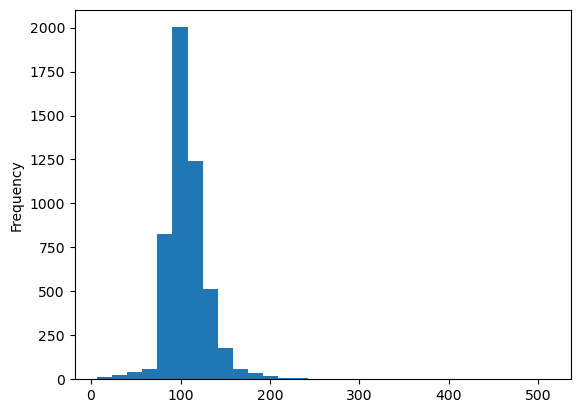

In [80]:
newmovies3.duration.plot(kind='hist', bins=30)

10
n: [3.14753438e-04 1.13704679e-02 7.59342669e-03 4.48523649e-04
 7.08195235e-05 2.75409258e-05 1.18032539e-05 0.00000000e+00
 0.00000000e+00 3.93441797e-06]
bins:  [  7.   57.4 107.8 158.2 208.6 259.  309.4 359.8 410.2 460.6 511. ]
++++++++++++++++
<BarContainer object of 10 artists>


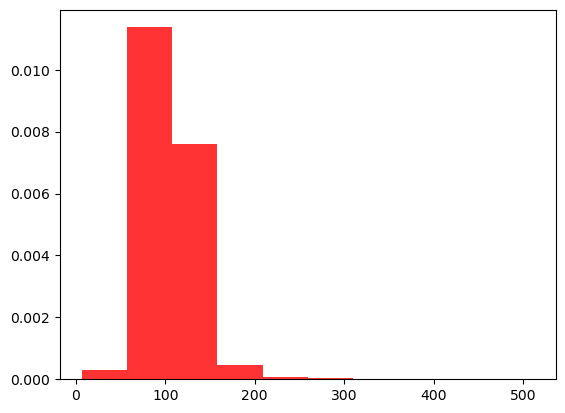

In [89]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(newmovies3['duration'], 10, density=1,facecolor = "r", alpha = 0.8)

print(len(n)) 
print("n:", n)
print("bins: ", bins)
print("++++++++++++++++")
print(patches)
plt.show()

Let's consider another dataset to understand different plotting choices. 

In [82]:
company = pd.read_csv('company.csv')
print(company.head())
print(company.shape)

  Name  sales_budget  marketing_budget  Income
0  PLP           123                90     400
1   MX           340                85     700
2   YP            45                55     210
3   UP            27                60     200
4   QT            80               100     225
(11, 4)


In [83]:
print(company.head(15))

   Name  sales_budget  marketing_budget  Income
0   PLP           123                90     400
1    MX           340                85     700
2    YP            45                55     210
3    UP            27                60     200
4    QT            80               100     225
5    AD            95               100     300
6    XC            26                40     150
7    MA            72                90     220
8    GP            66                80     290
9    LA            54                70     240
10   WT            43                50     150


In [84]:
company = pd.read_csv('company.csv')
company = company.set_index('Name')
print(company.head())

      sales_budget  marketing_budget  Income
Name                                        
PLP            123                90     400
MX             340                85     700
YP              45                55     210
UP              27                60     200
QT              80               100     225


We plot a scatter plot between the columns sales_budget and marketing_budget.

<Axes: xlabel='marketing_budget', ylabel='sales_budget'>

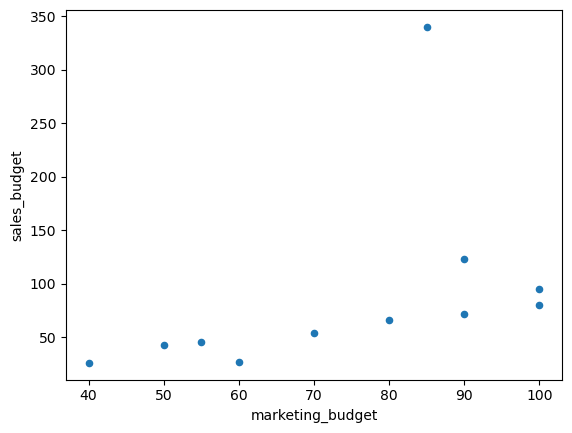

In [85]:
company.plot(kind='scatter', x ='marketing_budget', y='sales_budget')

Creating a series with column sales_budget.

In [86]:
sales = company['sales_budget'].copy(deep=True)
sales.sort_values(inplace=True)

print(sales)

Name
XC      26
UP      27
WT      43
YP      45
LA      54
GP      66
MA      72
QT      80
AD      95
PLP    123
MX     340
Name: sales_budget, dtype: int64


Text(0, 0.5, 'Sales')

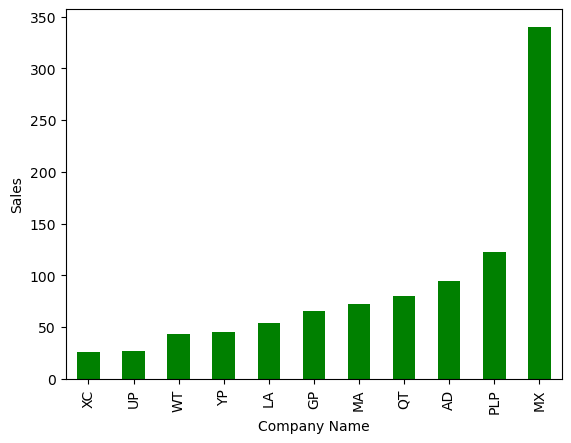

In [87]:
sales_plot = sales.plot(kind='bar', color='green')
sales_plot.set_xlabel("Company Name")
sales_plot.set_ylabel("Sales")

In [88]:
"""
In-class activity: Use the companies data frame and create a data 
series with company name and marketing budget. 
1) Create a bar graph with company name on the x-axis and 
marketing budget on the y-axis. 
"""

'\nIn-class activity: Use the companies data frame and create a data \nseries with company name and marketing budget. \n1) Create a bar graph with company name on the x-axis and \nmarketing budget on the y-axis. \n'

#### Important sites to get datasets from

https://archive.ics.uci.edu/ml/index.php

www.kaggle.com

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
